In [1]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
concrete_txt = np.genfromtxt("../data/concrete.csv", delimiter=" ,")

In [96]:
concrete = data.Data(concrete_txt, concrete_txt,              
                     target_names = ["Cement", "Slag", "Fly Ash", "Water", "Superplasticiser", "Coarse Agg", "Fine Ag", "Age"],
                      label_names = ["Strength"]   )

IndexError: list index out of range

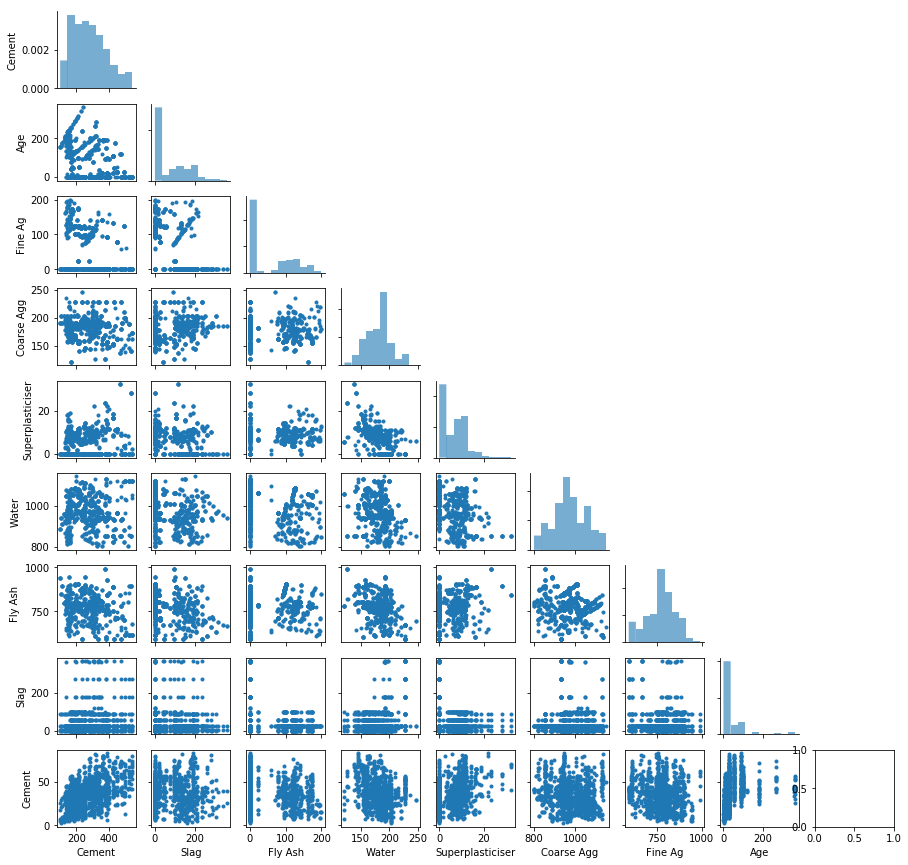

In [97]:
from heron import corner
corner.corner(concrete, figsize=(15,15))

In [7]:
from heron import regression
from heron import kernels

In [8]:
gp = regression.Regressor(concrete, kernel=kernels.SquaredExponential(ndim=8))

In [9]:
new_point = np.atleast_2d([0.1]*8)

In [10]:
new_point = np.atleast_2d(gp.training_data[1])
new_point[0,1]+=0.1

In [11]:
gp.prediction(new_point)

(array([ 22.50255699]), array([[-5915.86957992]]))

In [12]:
gp.set_hyperparameters([.1]*9)

-4562507.6246321686

In [13]:
gp.grad_loglikelihood()

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


array([  8.02449071e+11,   4.56609344e+09,   4.41297656e+08,
         1.97557844e+08,   1.57257521e+09,   3.62442155e+09,
         7.14251061e+08,   2.46749517e+09,   3.53284736e+10])

In [14]:
from scipy.optimize import minimize

In [15]:
def nll(p):
    p[0] = 1
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    p[0] = 1
    gp.set_hyperparameters(p)
    return -gp.grad_loglikelihood()

In [16]:
i = 0
x0 = [1]*9
x = np.tile(x0, (100,1))
x[:,i] = np.linspace(1,10,100)
y = map(nll, x)

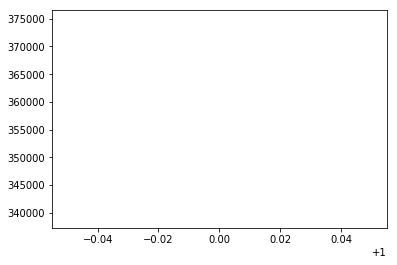

In [17]:
plt.plot(x[:,0], y)

In [18]:
x0 = [0.9]*9
x0[0] = 1
res = minimize(nll, x0, method='BFGS', jac=grad_nll ,options={'disp': True})

         Current function value: 291139.917532
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 80


In [19]:
gp.kernel.hyper

[1.0, [array([ 2.33688954,  2.41773291,  2.35980839,  2.27141026,  2.28898792,
          2.27086967,  2.30565629,  1.03415989])]]

In [18]:
gp.kernel.hyper

[1.0, [array([ 2.32428423,  2.41963301,  2.35374845,  2.28380637,  2.30156984,
          2.27231641,  2.29007522,  1.0275199 ])]]

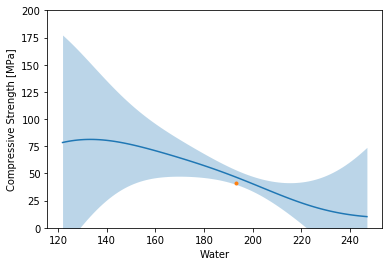

In [95]:
i = 3
test_point = 0
new_point = np.atleast_2d(concrete.test_targets[test_point])
new_point = np.tile(new_point, (100,1))
new_point[:,i] = np.linspace(0,1,100)
pred = gp.prediction(new_point)
x = gp.training_object.denormalise(new_point, gp.training_object.targets_scale)[:,i]
plt.plot(x, pred[0])
plt.ylim([0,200])
#plt.xlim([0,gp.training_object.targets_scale[1][i]])
plt.xlabel(gp.training_object.target_names[i])
#plt.xlabel(r"Superplasticiser [kg / m$^3$]")
plt.ylabel("Compressive Strength [MPa]")
err = np.diag(pred[1])
err = gp.training_object.denormalise(err, gp.training_object.labels_scale)
err *= 1.96
plt.fill_between(x, pred[0] - err, pred[0] + err , alpha = 0.3)
plt.plot(gp.training_object.denormalise(concrete.test_targets[test_point], gp.training_object.targets_scale)[i], 
        gp.training_object.denormalise(concrete.test_labels, gp.training_object.labels_scale)[test_point], '.')
#plt.savefig('superplasticiser.png', dpi=300)

In [84]:
concrete.test_targets[3], concrete.test_labels[3]

(array([ 0.65730594,  0.52587646,  0.        ,  0.19249201,  0.68322981,
         0.41773256,  0.40592072,  0.24725275]), 1.0)

In [29]:
import emcee

In [30]:
ndim = 9
burn = 10
nwalkers = 100
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [32]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, gp.set_hyperparameters, args=[])
# Run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burn)

In [18]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_lnlikelihood(y, quiet=True)

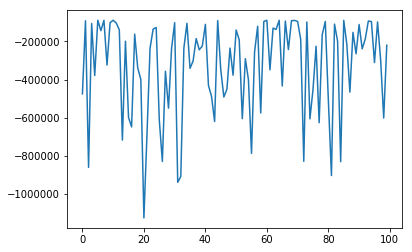

In [37]:
plt.plot(prob)

In [38]:
gp.loglikelihood()

-219719.59704498551

In [39]:
pos[-1]

array([ 0.49244046,  2.73157503,  0.58098634,  0.52088189, -3.03855323,
        2.96034444,  1.05788286, -0.11021227,  2.89234684])

In [40]:
np.exp(0)

1.0